In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

df=pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df.to_numpy()[:,0]##imprime la tabla (.to-numpy),desde primera columna hasta la ultima [:,0]columna 0.

In [ ]:
x=df.to_numpy()[:,1:]##imprime los valores desde la fila 1 hasta la ultima
x=np.reshape(x,(x.shape[0],28,28, 1))/255 ## la primer imagen y queremos todos los pixeles

8


TypeError: ignored

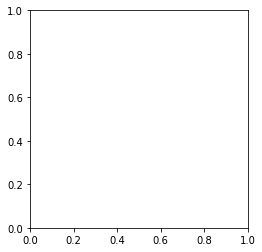

In [ ]:
i=10
print(y[i])
plt.imshow(x[i,:])

In [ ]:
model=tf.keras.Sequential([
                    tf.keras.layers.Input(shape=(28,28,1)),##tamaño de la enttrada       
                    tf.keras.layers.Conv2D(5,(3,3), padding='same', activation="relu"),##como sera la red, saltara 14 pixeles en 
                    ##matrices de 3x3 y 1 intento por otro, mantendra el ancho
                    tf.keras.layers.MaxPool2D(), ##va a comprimir la imagen y elegir el valor mas grande en la matriz por defecto es 2
                    tf.keras.layers.Conv2D(10,(3,3), padding='same', activation="relu"),##las redes son capas y capas de visualicion
                    tf.keras.layers.MaxPool2D(),##por eso se repite el codigo
                    tf.keras.layers.Conv2D(20,(3,3), padding='same', activation="relu"),
                    tf.keras.layers.MaxPool2D(),
                    tf.keras.layers.Conv2D(30,(3,3), padding='same', activation="relu"),
                   
                    tf.keras.layers.Flatten(),##el tamaño no afecta a la red
                    tf.keras.layers.Dense(100, activation="relu"),##empezamos con 100 neuronas
                    tf.keras.layers.Dense(10, activation="softmax"),##y terminamos con 10 para evitar sobreaprendizaje.
                    #softmax nos dira que probabilidad tiene
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 20)          1820      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 20)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 30)         

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["acc"])##como se entrenara el modelo
##se usa categorical, va a clasificar

In [ ]:
model.fit(x=x, y=y, epochs=20,validation_split=.2)

Epoch 1/20
1050/1050 [==============================] - 22s 20ms/step - loss: 0.3503 - acc: 0.8880 - val_loss: 0.1218 - val_acc: 0.9615
Epoch 2/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1030 - acc: 0.9668 - val_loss: 0.0685 - val_acc: 0.9780
Epoch 3/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0735 - acc: 0.9769 - val_loss: 0.0684 - val_acc: 0.9773
Epoch 4/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0619 - acc: 0.9796 - val_loss: 0.0610 - val_acc: 0.9806
Epoch 5/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0482 - acc: 0.9837 - val_loss: 0.0601 - val_acc: 0.9814
Epoch 6/20
 152/1050 [===>..........................] - ETA: 16s - loss: 0.0392 - acc: 0.9883

KeyboardInterrupt: ignored